# Prediction of letters as a function of data used
In this notebook we do the same tasks of predicting next letter using Nexa. However, we test here how does the prediction become with different number of data is used.

### Load libraries

In [1]:
import numpy as np
import h5py
from sklearn import svm, cross_validation
from sklearn.naive_bayes import MultinomialNB

### Load the Data

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_big.hdf5'
f = h5py.File(file_location, 'r')

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

# Load the particular example
Nspatial_clusters = 5
Ntime_clusters = 15
Nembedding = 3

run_name = '/low-resolution'
parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]

# Now we load the time and the code vectors
time = nexa['time']
code_vectors = nexa['code-vectors']
code_vectors_distance = nexa['code-vectors-distance']
code_vectors_softmax = nexa['code-vectors-softmax']
code_vectors_winner = nexa['code-vectors-winner']

### Make the predictions

In [14]:
data_ammount = np.logspace(2, 5, 30, dtype='int')
delay = 4
accuracy = []

In [15]:
# Make prediction with scikit-learn
for N in data_ammount:
    X = code_vectors_winner[:(N - delay)]
    y = letters_sequence[delay:N]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf = svm.SVC(C=1.0, cache_size=200, kernel='linear')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100.0
    print('N_data', N)
    print('SVM score', score)
    accuracy.append(score)

print('Analysis donde')

N_data 100
SVM score 60.0
N_data 126
SVM score 46.1538461538
N_data 161
SVM score 43.75
N_data 204
SVM score 50.0
N_data 259
SVM score 53.8461538462
N_data 329
SVM score 60.6060606061
N_data 417
SVM score 59.5238095238
N_data 529
SVM score 60.3773584906
N_data 672
SVM score 64.1791044776
N_data 853
SVM score 67.0588235294
N_data 1082
SVM score 57.4074074074
N_data 1373
SVM score 76.6423357664
N_data 1743
SVM score 64.9425287356
N_data 2212
SVM score 67.8733031674
N_data 2807
SVM score 67.2597864769
N_data 3562
SVM score 68.5393258427
N_data 4520
SVM score 70.796460177
N_data 5736
SVM score 69.6864111498
N_data 7278
SVM score 69.0934065934
N_data 9236
SVM score 67.7489177489
N_data 11721
SVM score 66.638225256
N_data 14873
SVM score 69.3342299933
N_data 18873
SVM score 68.5214626391
N_data 23950
SVM score 68.3089770355
N_data 30391
SVM score 70.3191839421
N_data 38566
SVM score 69.7951775992
N_data 48939
SVM score 69.6771557009
N_data 62101
SVM score 68.0032206119
N_data 78804
SVM score

### Plot the Accuracy as a function of the ammount of  data

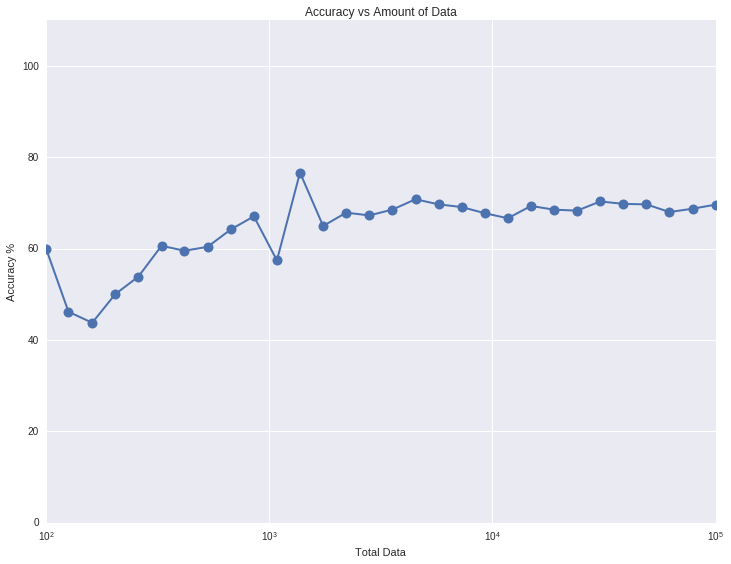

In [25]:
# Plot this
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(data_ammount, accuracy, 'o-', lw=2, markersize=10)
plt.xlabel('Total Data')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs Amount of Data')
plt.ylim([0, 110])
plt.xscale('log')
fig = plt.gcf()
fig.set_size_inches((12, 9))